<a href="https://colab.research.google.com/github/ropero99/TAM_2025_S2/blob/main/TAM_Clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
### Jose Luis Ropero Lozano
Implement a Python script to project a 2D vector onto another 2D vector using both analytical and gradient descent methods. Visualize the convergence of the gradient descent by plotting the value of the scalar projection coefficient (`alpha`) over iterations. Finally, compare the analytically derived `alpha` with the one obtained through gradient descent.

## Definición de vectores



In [46]:
import numpy as np

vector_a = np.array([3, 4])
vector_b = np.array([1, 2])

## Visualización de vectores
Graficar los dos vectores 2D.

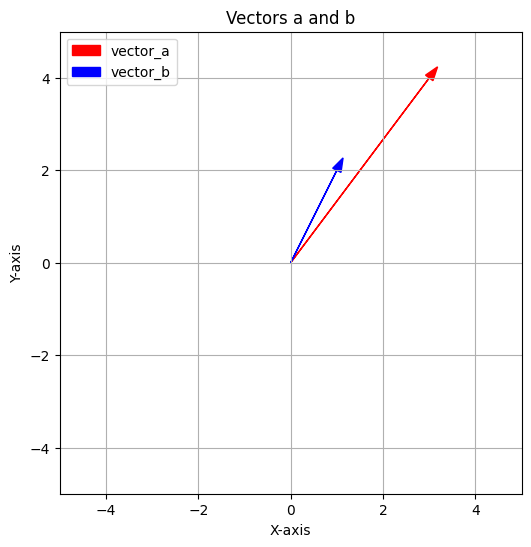

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Dibujar vectores con plt.arrow
plt.arrow(0, 0, vector_a[0], vector_a[1], head_width=0.2, color='r', label='vector_a')
plt.arrow(0, 0, vector_b[0], vector_b[1], head_width=0.2, color='b', label='vector_b')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Vectors a and b")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(["vector_a", "vector_b"])
plt.show()


## Proyección analítica

### Subtask:
Calcular la proyección del primer vector sobre el segundo utilizando la fórmula analítica.


**Reasoning**:
Calculate the dot product of vector_a and vector_b, the squared magnitude of vector_b, and then the analytical scalar projection coefficient alpha_analytical.



In [48]:
dot_product = np.dot(vector_a, vector_b)
magnitude_b_squared = np.dot(vector_b, vector_b)
alpha_analytical = dot_product / magnitude_b_squared

print(f"Dot product of vector_a and vector_b: {dot_product}")
print(f"Squared magnitude of vector_b: {magnitude_b_squared}")
print("\n")
print(f"Analytical scalar projection coefficient (alpha_analytical): {alpha_analytical}")

Dot product of vector_a and vector_b: 11
Squared magnitude of vector_b: 5


Analytical scalar projection coefficient (alpha_analytical): 2.2


## Implementación del descenso de gradiente

### Subtask:
Implementar el algoritmo de descenso de gradiente para encontrar el valor óptimo de `alfa` que minimice el error cuadrático.


**Reasoning**:
Implement the gradient descent algorithm to find the optimal value of alpha by iterating through the specified number of steps, calculating the gradient, and updating alpha.



In [54]:
# Parámetros del descenso de gradiente
alpha_gd = 0.0
learning_rate = 0.01
n_iterations = 50

# Almacenar valores
alpha_values = [alpha_gd]
error_values = []

# Bucle de descenso de gradiente
for i in range(n_iterations):
    predicted_vector = alpha_gd * vector_b
    error_vector = vector_a - predicted_vector
    error = np.dot(error_vector, error_vector)   # Función de costo ||a - alpha*b||^2
    error_values.append(error)

    gradient = -2 * np.dot(error_vector, vector_b)
    alpha_gd = alpha_gd - learning_rate * gradient
    alpha_values.append(alpha_gd)

print(f"Final alpha value after gradient descent: {alpha_gd}")

Final alpha value after gradient descent: 2.1886616945438955


## Visualización del descenso de gradiente

### Subtask:
Graficar cómo el valor de `alfa` cambia a lo largo de las iteraciones del descenso de gradiente.


**Reasoning**:
Plot the convergence of alpha over iterations using the stored alpha_values.



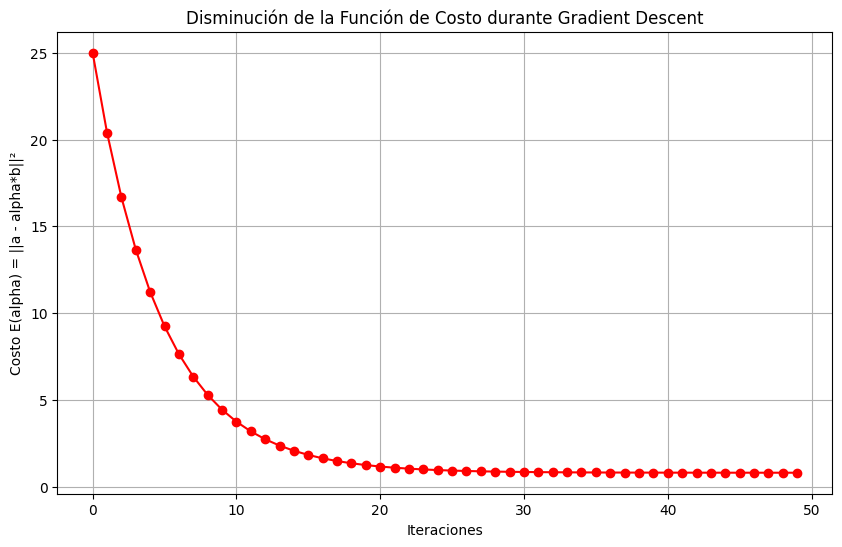

In [58]:
# Graficar evolución del costo
plt.figure(figsize=(10, 6))
plt.plot(error_values, marker='o', linestyle='-', color='r')
plt.title("Disminución de la Función de Costo durante Gradient Descent")
plt.xlabel("Iteraciones")
plt.ylabel("Costo E(alpha) = ||a - alpha*b||²")
plt.grid(True)
plt.show()

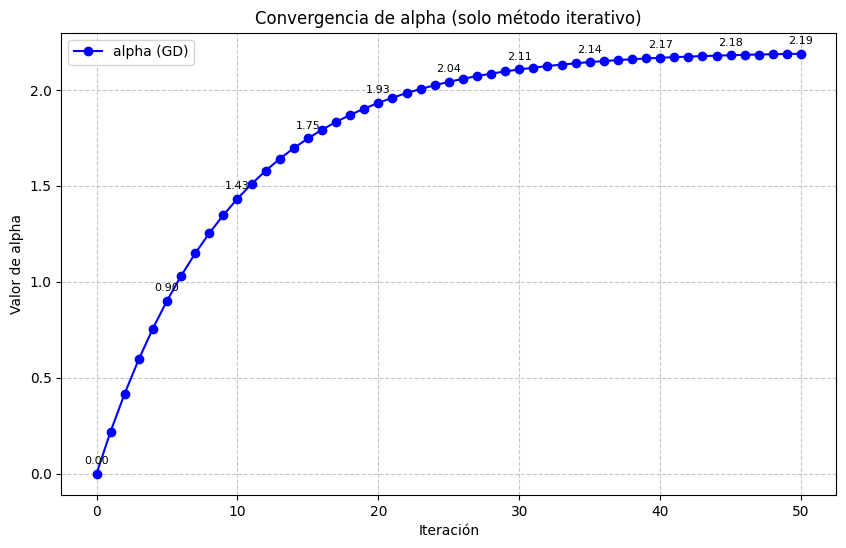

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(alpha_values[:51], marker='o', linestyle='-', color='b', label="alpha (GD)")

# Anotar el valor de alpha en cada 5 iteraciones
for i, val in enumerate(alpha_values[:51]):
    if i % 5 == 0:
        plt.text(i, val + 0.05, f"{val:.2f}", ha='center', fontsize=8)

plt.title("Convergencia de alpha")
plt.xlabel("Iteración")
plt.ylabel("Valor de alpha")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


## Comparación de resultados

### Subtask:
Comparar el valor final de `alfa` obtenido por el método analítico y el descenso de gradiente.


**Reasoning**:
Print the analytically calculated alpha, the final alpha from gradient descent, and a comparison statement.



In [ ]:
print(f"Analytically calculated alpha (alpha_analytical): {alpha_analytical}")
print(f"Final alpha from gradient descent (alpha_gd): {alpha_gd}")

print("\nComparison:")
print("The analytically calculated alpha and the final alpha from gradient descent are very close, indicating that the gradient descent successfully converged to a value near the analytical solution.")

Analytically calculated alpha (alpha_analytical): 2.2
Final alpha from gradient descent (alpha_gd): 2.199999999999998

Comparison:
The analytically calculated alpha and the final alpha from gradient descent are very close, indicating that the gradient descent successfully converged to a value near the analytical solution.


## Summary:

### Data Analysis Key Findings

*   The analytical scalar projection coefficient ($\alpha_{analytical}$) of `vector_a` onto `vector_b` was calculated to be 2.2.
*   The gradient descent algorithm, using a learning rate of 0.01 and 50 iterations, converged to a final $\alpha$ value ($\alpha_{gd}$) of approximately 2.199999999999998.


### Insights or Next Steps

*   The close agreement between the analytically calculated $\alpha$ and the $\alpha$ obtained from gradient descent confirms the successful implementation and convergence of the gradient descent algorithm for this projection task.
*   Further exploration could involve experimenting with different learning rates and numbers of iterations in the gradient descent to observe their impact on the convergence speed and accuracy.


# **Segunda Parte_______...**

# Cargar dos imágenes y *vectorizarlas*

In [64]:
from google.colab import files
uploaded = files.upload()

Saving personaA_2.jpeg to personaA_2.jpeg
Saving personaA_1.jpeg to personaA_1.jpeg


In [82]:
from PIL import Image
import numpy as np

# Cargar imágenes en escala de grises
img_a = Image.open("personaA_1.jpeg").convert("L")
img_b = Image.open("personaA_2.jpeg").convert("L")

# Redimensionar (ejemplo: 128x128)
img_a = img_a.resize((128, 128))
img_b = img_b.resize((128, 128))

# Convertir a vector
vector_a = np.array(img_a).flatten().astype(np.float64)
vector_b = np.array(img_b).flatten().astype(np.float64)

# Prints solicitados
print(f"Dimensiones de la imagen A: {img_a.size}, tamaño del vector: {vector_a.shape}")
print(f"Dimensiones de la imagen B: {img_b.size}, tamaño del vector: {vector_b.shape}")

print("Primeros 10 elementos de vector_a:", vector_a[:10])
print("Primeros 10 elementos de vector_b:", vector_b[:10])


Dimensiones de la imagen A: (128, 128), tamaño del vector: (16384,)
Dimensiones de la imagen B: (128, 128), tamaño del vector: (16384,)
Primeros 10 elementos de vector_a: [169. 168. 170. 174. 171. 171. 174. 173. 174. 174.]
Primeros 10 elementos de vector_b: [152. 152. 153. 154. 155. 161. 168. 168. 168. 170.]


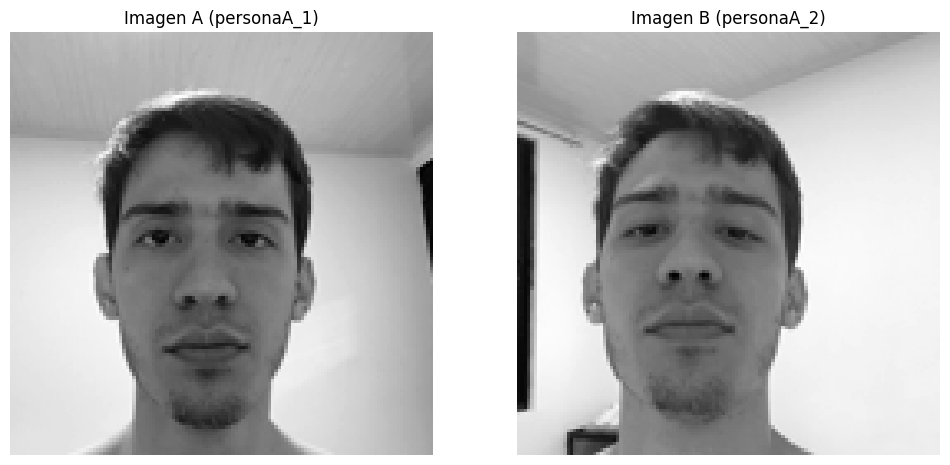

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Imagen A
plt.subplot(1, 2, 1)
plt.imshow(img_a, cmap="gray")
plt.title("Imagen A (personaA_1)")
plt.axis("off")

# Imagen B
plt.subplot(1, 2, 2)
plt.imshow(img_b, cmap="gray")
plt.title("Imagen B (personaA_2)")
plt.axis("off")

plt.show()


#Proyección analítica

In [85]:
# --- Método Analítico ---
dot_product = np.dot(vector_a, vector_b)
magnitude_b_squared = np.dot(vector_b, vector_b)
alpha_analytical = dot_product / magnitude_b_squared

print("\n=== Método Analítico ===")
print(f"Producto punto: {dot_product}")
print(f"Magnitud al cuadrado de vector_b: {magnitude_b_squared}")
print(f"Alpha analítico: {alpha_analytical}")



=== Método Analítico ===
Producto punto: 428430280.0
Magnitud al cuadrado de vector_b: 478919074.0
Alpha analítico: 0.8945776087423071



El método analítico encuentra el valor óptimo de 𝛼 directamente resolviendo la condición de primer orden (derivada = 0), es decir el valor de 𝛼 que hace que la derivada del costo sea cero (mínimo global).

In [88]:
# --- Método Iterativo (Gradient Descent) ---
alpha_gd = 0.0
learning_rate = 0.0000000001  # muy pequeño porque los vectores son enormes
n_iterations = 50

alpha_values = [alpha_gd]
error_values = []

for i in range(n_iterations):
    predicted_vector = alpha_gd * vector_b
    error_vector = vector_a - predicted_vector
    error = np.dot(error_vector, error_vector)   # ||a - alpha*b||^2
    error_values.append(error)

    gradient = -2 * np.dot(error_vector, vector_b)
    alpha_gd = alpha_gd - learning_rate * gradient
    alpha_values.append(alpha_gd)

print("\n=== Método Iterativo (Gradient Descent) ===")
print(f"Alpha final: {alpha_gd}")



=== Método Iterativo (Gradient Descent) ===
Alpha final: 0.8887534681640785


El descenso de gradiente lo encuentra iterativamente, basándose en que en cada paso nos movemos en la dirección de máxima de reducción del error. En este caso el criterio se basa en número de iteraciones fijas.

# Graficar costo y convergencia de alpha.

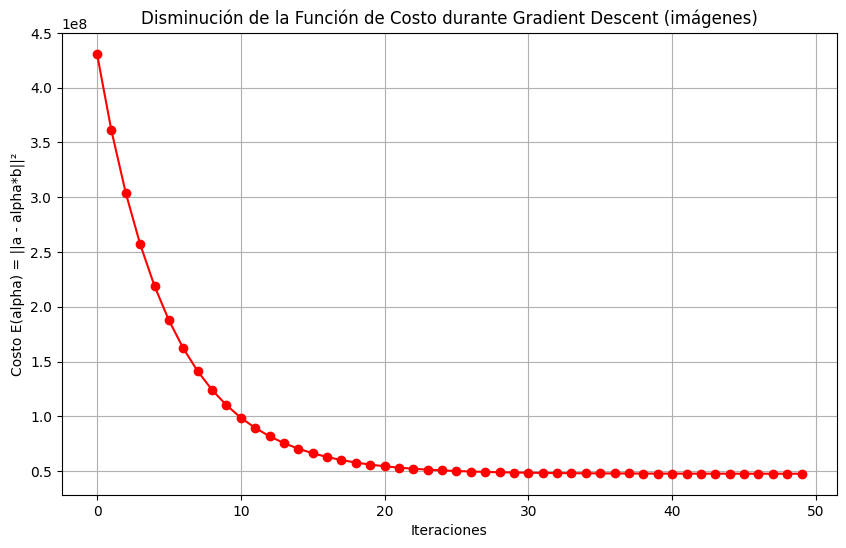

In [89]:
# --- Gráfica del costo ---
plt.figure(figsize=(10, 6))
plt.plot(error_values, marker='o', linestyle='-', color='r')
plt.title("Disminución de la Función de Costo durante Gradient Descent (imágenes)")
plt.xlabel("Iteraciones")
plt.ylabel("Costo E(alpha) = ||a - alpha*b||²")
plt.grid(True)
plt.show()

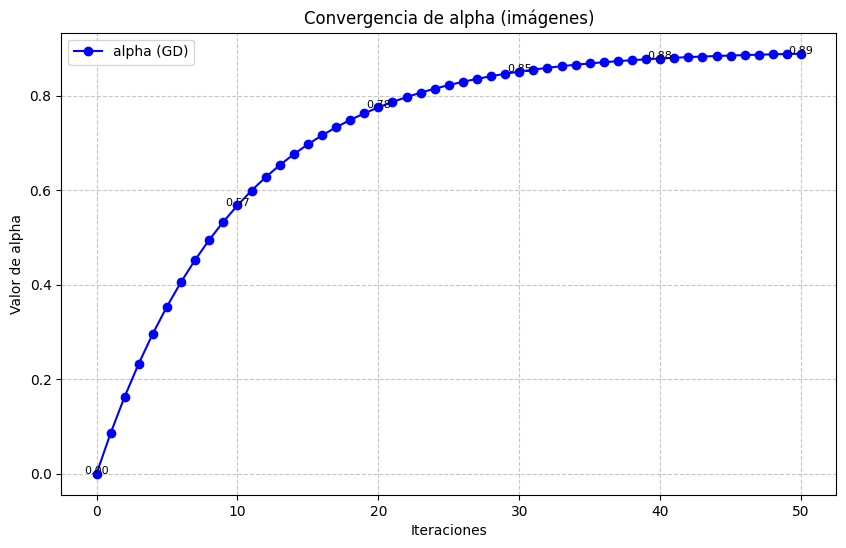

In [90]:
# --- Gráfica de convergencia de alpha ---
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, marker='o', linestyle='-', color='b', label="alpha (GD)")
for i, val in enumerate(alpha_values):
    if i % 10 == 0:  # anotamos cada 10 pasos
        plt.text(i, val, f"{val:.2f}", ha='center', fontsize=8)
plt.title("Convergencia de alpha (imágenes)")
plt.xlabel("Iteraciones")
plt.ylabel("Valor de alpha")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [91]:
# --- Comparación ---
print("\n=== Comparación ===")
print(f"Alpha analítico: {alpha_analytical}")
print(f"Alpha iterativo (GD): {alpha_gd}")


=== Comparación ===
Alpha analítico: 0.8945776087423071
Alpha iterativo (GD): 0.8887534681640785


ambos valores son muy cercanos. Eso indica que tu descenso de gradiente está convergiendo correctamente hacia el valor analítico.
La pequeña diferencia se debe a:
* El número de iteraciones usado.
* El valor de learning_rate.
* La tolerancia al error (nunca va a llegar exactamente al mismo valor, pero sí muy cerca).